# Modeling of the Poisson process

To simulate the realisation of a Poisson process of length N with a given distribution law F(x) of intervals between jumps.
The expectation M = 1 and the value of the coefficient of variation c = 2 are given for the distribution.
Task:
- Set the number of realisations K and their length T. According to the given M and c, select the parameters of the distribution F(x), simulate and present on the graph K realisations of a Poisson process of length T with a given distribution F(x).
- Check the law of large numbers at t = T/2 and t = T
- Check the central limit theorem for t = T/2 and t = T
- According to the given realisations of the process, select the distribution function and test the hypothesis of agreement.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

from scipy.stats import erlang
import pandas as pd
import statistics
import math

In [3]:
M = 1
c = 2
sigma = 0.5 #c = sigma/M
lambd = 4
k = 4

In [4]:
def generate(m, a, c, x_start, number):
    gen_list = [x_start]
    x_prev = x_start
    for elt in range(number-1):
        x_prev = (a*x_prev+c)%m
        gen_list.append(x_prev)
    return gen_list

In [10]:
def get_recov_processes(K, T):
  K_big = 20000
  k = 4
  sum_array_0 = [[] for i in range(K)]
  nums_of_intervals = [[] for i in range(K)]
  for num_proc in range(K):
    u1 = list(np.array(generate(16807, 0x7fffffff, 0, num_proc+1, K_big*4))/16807)         
    E = [0]*K_big*4
    for i in range(K_big):
        for j in range(k):
          E[i] = E[i] - 1/lambd*math.log(u1[j*K_big + i])

    S = 0
    for i in range(K_big):
      if S<T:
        # print(S,T)
        S += E[i]
        sum_array_0[num_proc].append(S)
      else: 
        nums_of_intervals[num_proc].append(i)
        break
  return E, sum_array_0, nums_of_intervals

In [ ]:
sum_array_0 = []
S = 0
nums_of_intervals =  0
for i in range(K_big):
  if S<T:
    # print(S,T)
    S += E[i]
    sum_array_0.append(S)
    nums_of_intervals +=1
  else: break

In [2]:
K = 50
T = 50

In [11]:
E_0, sum_array_0, nums_of_intervals_0 = get_recov_processes(K, T)

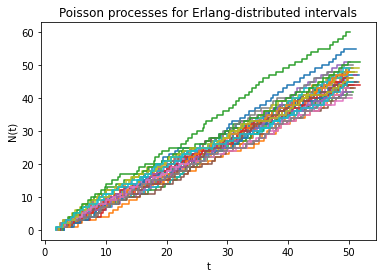

In [12]:
for i in range(K):
  x = np.array(sum_array_0[i])
  y = np.array([i for i in range(nums_of_intervals_0[i][0])])
    
  plt.step(x, y)
  plt.xlabel('t');
  plt.ylabel('N(t)');
  plt.title('Poisson processes for Erlang-distributed intervals');
plt.show()


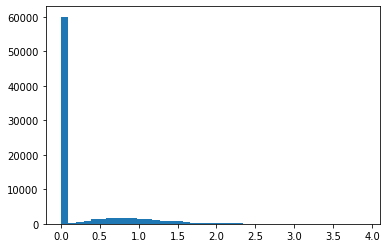

In [14]:
plt.hist(E_0, bins = 40);

# Checking the law of large numbers


In [93]:
_, sum_array_1, nums_of_intervals_1 = get_recov_processes(K = 1,T = 500)
N_t = list(range(nums_of_intervals_1[0][0]))
t = sum_array_1[0]

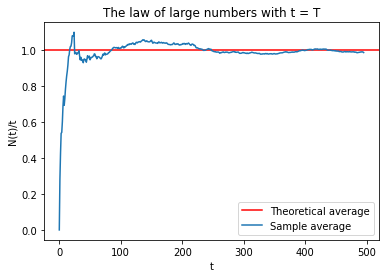

In [99]:
num_avg = []
for i in range(len(t)):
    num_avg.append(N_t[i]/t[i])

M = 1
plt.axhline(y = M, color = 'r', linestyle = '-', label = 'Theoretical average')
plt.plot(num_avg, label = 'Sample average');
plt.xlabel('t');
plt.ylabel('N(t)/t');
plt.title('The law of large numbers with t = T');
plt.legend();

In [ ]:
N_t = list(range(nums_of_intervals_1[0][0]))

In [96]:
t_2 = [time for time in sum_array_1[0] if time < T/2]

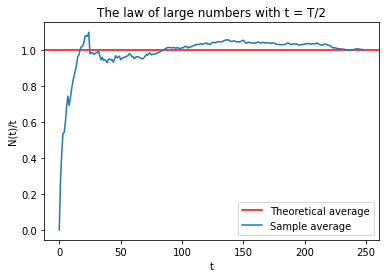

In [102]:
num_avg = []
for i in range(len(t_2)):
    num_avg.append(i/t_2[i])

M = 1
plt.axhline(y = M, color = 'r', linestyle = '-', label = 'Theoretical average')
plt.plot(num_avg, label = 'Sample average');
plt.xlabel('t');
plt.ylabel('N(t)/t');
plt.title('The law of large numbers with t = T/2');
plt.legend();

# Checking the central limit theorem

In [59]:
def get_num_norm(K, T):
  t = T
  N_t = [0]*K
  max_N = [0]*K
  for i in range(K):
    for j, elem in enumerate(sum_array_2[i]):
      if elem <= t:
        # N_t[i] = j
        max_N[i] += 1 

  num_norm = []
  for i in range(K):
    val = (max_N[i] - statistics.mean(max_N))/(statistics.stdev(max_N))
    num_norm.append(val)
  return num_norm

In [55]:
_, sum_array_2, nums_of_intervals_2 = get_recov_processes(K = 100,T = 100)

In [60]:
num_norm = get_num_norm(K = 100,T = 100)

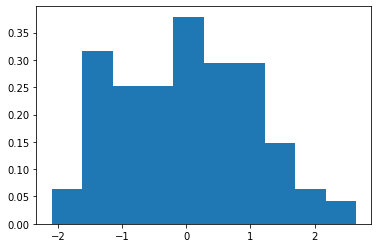

In [61]:
plt.hist(num_norm, density=True);

In [58]:
stats.kstest(num_norm, 'norm')

KstestResult(statistic=0.08085802793543595, pvalue=0.5045661392249077)

In [62]:
num_norm = get_num_norm(K = 100,T = 50)

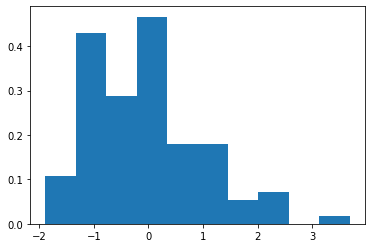

In [63]:
plt.hist(num_norm, density=True);

In [64]:
stats.kstest(num_norm, 'norm')

KstestResult(statistic=0.08810012705744186, pvalue=0.3965373977216896)

# Checking the distribution?


In [80]:
_, sum_array_0, nums_of_intervals = get_recov_processes(100, 100)

In [81]:
K = 100
t = 100
N_t = [0]*K
max_N = [0]*K
for i in range(K):
  for j, elem in enumerate(sum_array_0[i]):
    if elem <= t:
      max_N[i] += 1 

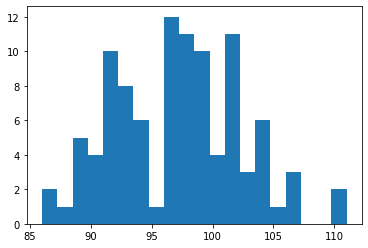

In [82]:
plt.hist(max_N, bins = 20);

In [83]:
stats.kstest(max_N,'norm')

KstestResult(statistic=1.0, pvalue=0.0)

In [84]:
from scipy.stats import poisson

K = len(max_N)
num_interv = 6

mu=statistics.mean(max_N)
std_1=statistics.stdev(max_N)
pmax=max(max_N);
pmin=min(sorted(max_N)[1:]);
dis=(pmax-pmin)/(num_interv-1);
num=[0]*num_interv

i=0;
while i<num_interv:
  for j in range(i, K):
    if (max_N[j]>=pmin) and (max_N[j]<pmin+dis):
      num[i]=num[i]+1
  pmin=pmin+dis
  i=i+1

pmin=min(max_N);

F = [0]*num_interv
F[0]=poisson.cdf(pmin,mu)
F[1]=poisson.cdf(pmin+dis,mu)
F[2]=poisson.cdf(pmin+2*dis,mu)
F[3]=poisson.cdf(pmin+3*dis,mu)
F[4]=poisson.cdf(pmin+4*dis,mu)
F[5]=poisson.cdf(pmax,mu)


p = [0]*num_interv
p[0] = F[0]
for i in range(1,num_interv-1):
  p[i]=F[i]-F[i-1]
p[5] = 1 - F[5]

k = 0
for i in range(num_interv):
  k = k+((num[i]-K*p[i])**2)/(K*p[i])
k

48.36742150484645

The deviation is too large

In [85]:
num

[17, 24, 36, 18, 2, 1]

In [86]:
p

[0.14119067277253525,
 0.11457821804159454,
 0.18785477052085547,
 0.19843873434045461,
 0.16342880825229,
 0.07381032598558801]

In [87]:
sum(p)

0.8793015299133179